## Goal of notebook

This notebook aims to quantify the effect of neglecting topological effects in the Stein dynamics. To do this, we investigate the output samples on a two-dimensional von Mises distribution.

# Import tools

In [1]:
from models.vM_sphere import vM_sphere
from src.samplers import samplers
from scripts.plot_helper_functions import collect_samples
import numpy as np
%matplotlib inline
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
import corner
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
from scripts.plot_helper_functions import set_axes_equal

# Setup von Mises distribution

In [2]:
kappa = 100
mu = np.array([1, 0, 0]) # Direction in R^3
model = vM_sphere(kappa=kappa, mu=mu)

# Visualize von Mises-Fisher samples

C:\Users\Alex\AppData\Local\Temp\ipykernel_11720\157147330.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


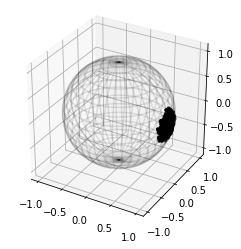

In [3]:
# Wireframe sphere
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'})

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))
ax.plot_wireframe(x, y, z, color='k', alpha=0.1, rstride=1, cstride=1)

# von Mises-Fisher samples
ground_truth = model.sample_vMF(mu=mu, kappa=kappa, num_samples=1000)
ax.scatter(ground_truth[:,0], ground_truth[:,1], ground_truth[:,2], s=10, c='k', zorder=10)

# Visualize
ax.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
set_axes_equal(ax) # IMPORTANT - this is also required
fig.show()

# Visualize von Mises-Fisher on $(\theta, \phi)$ space

C:\Users\Alex\AppData\Local\Temp\ipykernel_11720\450502351.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


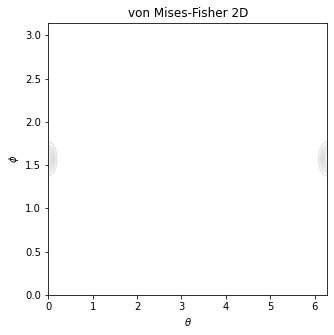

In [5]:
fig1, ax1 = plt.subplots(figsize = (5, 5))
ngrid = 500

x = np.linspace(0, 2 * np.pi, ngrid)
y = np.linspace(0, np.pi, ngrid)

X, Y = np.meshgrid(x, y)
Z = np.exp(-1 * model.getMinusLogPosterior_ensemble(np.vstack((np.ndarray.flatten(X), np.ndarray.flatten(Y))).T).reshape(ngrid,ngrid))
ax1.contour(X, Y, Z, 7, colors='black', alpha=0.1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\phi$')
plt.title('von Mises-Fisher 2D')
fig1.show()

# Run dynamics

In [49]:
sampler1 = samplers(model=model, nIterations=100, nParticles=200, profile=False)
sampler1.apply(method='sSVGD', eps=0.02)

  0%|          | 0/100 [00:00<?, ?it/s]

Stepsize 0.020000 | Median bandwidth: 1.085877:   1%|          | 1/100 [00:00<00:10,  9.52it/s]

Stepsize 0.020000 | Median bandwidth: 1.236368:   1%|          | 1/100 [00:00<00:10,  9.52it/s]

Stepsize 0.020000 | Median bandwidth: 1.388545:   3%|▎         | 3/100 [00:00<00:08, 11.87it/s]

Stepsize 0.020000 | Median bandwidth: 1.531807:   3%|▎         | 3/100 [00:00<00:08, 11.87it/s]

Stepsize 0.020000 | Median bandwidth: 1.652358:   5%|▌         | 5/100 [00:00<00:09,  9.55it/s]

Stepsize 0.020000 | Median bandwidth: 1.747564:   6%|▌         | 6/100 [00:00<00:10,  9.10it/s]

Stepsize 0.020000 | Median bandwidth: 1.791794:   7%|▋         | 7/100 [00:00<00:10,  9.29it/s]

Stepsize 0.020000 | Median bandwidth: 1.823317:   7%|▋         | 7/100 [00:00<00:10,  9.29it/s]

Stepsize 0.020000 | Median bandwidth: 1.849109:   9%|▉         | 9/100 [00:00<00:08, 10.80it/s]

Stepsize 0.020000 | Median bandwidth: 1.881237:   9%|▉         | 9/100 [00:00<00:08, 10.80it/s]

Stepsize 0.020000 | Median bandwidth: 1.880708:  11%|█         | 11/100 [00:01<00:07, 12.18it/s]

Stepsize 0.020000 | Median bandwidth: 1.910050:  11%|█         | 11/100 [00:01<00:07, 12.18it/s]

Stepsize 0.020000 | Median bandwidth: 1.928722:  13%|█▎        | 13/100 [00:01<00:06, 13.13it/s]

Stepsize 0.020000 | Median bandwidth: 1.956652:  13%|█▎        | 13/100 [00:01<00:06, 13.13it/s]

Stepsize 0.020000 | Median bandwidth: 1.952257:  15%|█▌        | 15/100 [00:01<00:06, 13.81it/s]

Stepsize 0.020000 | Median bandwidth: 1.950350:  15%|█▌        | 15/100 [00:01<00:06, 13.81it/s]

Stepsize 0.020000 | Median bandwidth: 1.942797:  17%|█▋        | 17/100 [00:01<00:05, 14.32it/s]

Stepsize 0.020000 | Median bandwidth: 1.958787:  17%|█▋        | 17/100 [00:01<00:05, 14.32it/s]

Stepsize 0.020000 | Median bandwidth: 1.974535:  19%|█▉        | 19/100 [00:01<00:05, 15.28it/s]

Stepsize 0.020000 | Median bandwidth: 1.976451:  19%|█▉        | 19/100 [00:01<00:05, 15.28it/s]

Stepsize 0.020000 | Median bandwidth: 1.991067:  21%|██        | 21/100 [00:01<00:05, 15.76it/s]

Stepsize 0.020000 | Median bandwidth: 1.968406:  21%|██        | 21/100 [00:01<00:05, 15.76it/s]

Stepsize 0.020000 | Median bandwidth: 1.936677:  23%|██▎       | 23/100 [00:01<00:04, 16.44it/s]

Stepsize 0.020000 | Median bandwidth: 1.933910:  23%|██▎       | 23/100 [00:01<00:04, 16.44it/s]

Stepsize 0.020000 | Median bandwidth: 1.933411:  25%|██▌       | 25/100 [00:01<00:04, 16.98it/s]

Stepsize 0.020000 | Median bandwidth: 1.922589:  25%|██▌       | 25/100 [00:01<00:04, 16.98it/s]

Stepsize 0.020000 | Median bandwidth: 1.898060:  27%|██▋       | 27/100 [00:01<00:04, 17.24it/s]

Stepsize 0.020000 | Median bandwidth: 1.906660:  27%|██▋       | 27/100 [00:02<00:04, 17.24it/s]

Stepsize 0.020000 | Median bandwidth: 1.874981:  29%|██▉       | 29/100 [00:02<00:04, 17.24it/s]

Stepsize 0.020000 | Median bandwidth: 1.886168:  29%|██▉       | 29/100 [00:02<00:04, 17.24it/s]

Stepsize 0.020000 | Median bandwidth: 1.908019:  31%|███       | 31/100 [00:02<00:03, 17.84it/s]

Stepsize 0.020000 | Median bandwidth: 1.867750:  31%|███       | 31/100 [00:02<00:03, 17.84it/s]

Stepsize 0.020000 | Median bandwidth: 1.868239:  31%|███       | 31/100 [00:02<00:03, 17.84it/s]

Stepsize 0.020000 | Median bandwidth: 1.850184:  34%|███▍      | 34/100 [00:02<00:04, 15.65it/s]

Stepsize 0.020000 | Median bandwidth: 1.865090:  34%|███▍      | 34/100 [00:02<00:04, 15.65it/s]

Stepsize 0.020000 | Median bandwidth: 1.849485:  36%|███▌      | 36/100 [00:02<00:03, 16.60it/s]

Stepsize 0.020000 | Median bandwidth: 1.834936:  36%|███▌      | 36/100 [00:02<00:03, 16.60it/s]

Stepsize 0.020000 | Median bandwidth: 1.795954:  38%|███▊      | 38/100 [00:02<00:03, 15.77it/s]

Stepsize 0.020000 | Median bandwidth: 1.761956:  38%|███▊      | 38/100 [00:02<00:03, 15.77it/s]

Stepsize 0.020000 | Median bandwidth: 1.758440:  40%|████      | 40/100 [00:02<00:03, 15.87it/s]

Stepsize 0.020000 | Median bandwidth: 1.736021:  40%|████      | 40/100 [00:02<00:03, 15.87it/s]

Stepsize 0.020000 | Median bandwidth: 1.737618:  42%|████▏     | 42/100 [00:02<00:03, 15.66it/s]

Stepsize 0.020000 | Median bandwidth: 1.733773:  42%|████▏     | 42/100 [00:02<00:03, 15.66it/s]

Stepsize 0.020000 | Median bandwidth: 1.709168:  44%|████▍     | 44/100 [00:03<00:03, 15.37it/s]

Stepsize 0.020000 | Median bandwidth: 1.689450:  44%|████▍     | 44/100 [00:03<00:03, 15.37it/s]

Stepsize 0.020000 | Median bandwidth: 1.684099:  46%|████▌     | 46/100 [00:03<00:03, 15.27it/s]

Stepsize 0.020000 | Median bandwidth: 1.685855:  46%|████▌     | 46/100 [00:03<00:03, 15.27it/s]

Stepsize 0.020000 | Median bandwidth: 1.675156:  48%|████▊     | 48/100 [00:03<00:03, 15.13it/s]

Stepsize 0.020000 | Median bandwidth: 1.666106:  48%|████▊     | 48/100 [00:03<00:03, 15.13it/s]

Stepsize 0.020000 | Median bandwidth: 1.665028:  50%|█████     | 50/100 [00:03<00:03, 15.04it/s]

Stepsize 0.020000 | Median bandwidth: 1.678368:  50%|█████     | 50/100 [00:03<00:03, 15.04it/s]

Stepsize 0.020000 | Median bandwidth: 1.668598:  52%|█████▏    | 52/100 [00:03<00:03, 14.71it/s]

Stepsize 0.020000 | Median bandwidth: 1.671074:  52%|█████▏    | 52/100 [00:03<00:03, 14.71it/s]

Stepsize 0.020000 | Median bandwidth: 1.654390:  54%|█████▍    | 54/100 [00:03<00:03, 14.33it/s]

Stepsize 0.020000 | Median bandwidth: 1.636919:  54%|█████▍    | 54/100 [00:03<00:03, 14.33it/s]

Stepsize 0.020000 | Median bandwidth: 1.611749:  56%|█████▌    | 56/100 [00:03<00:03, 14.57it/s]

Stepsize 0.020000 | Median bandwidth: 1.596768:  56%|█████▌    | 56/100 [00:03<00:03, 14.57it/s]

Stepsize 0.020000 | Median bandwidth: 1.608966:  58%|█████▊    | 58/100 [00:03<00:02, 14.87it/s]

Stepsize 0.020000 | Median bandwidth: 1.577607:  58%|█████▊    | 58/100 [00:04<00:02, 14.87it/s]

Stepsize 0.020000 | Median bandwidth: 1.540815:  60%|██████    | 60/100 [00:04<00:02, 14.75it/s]

Stepsize 0.020000 | Median bandwidth: 1.536278:  60%|██████    | 60/100 [00:04<00:02, 14.75it/s]

Stepsize 0.020000 | Median bandwidth: 1.569144:  62%|██████▏   | 62/100 [00:04<00:02, 14.90it/s]

Stepsize 0.020000 | Median bandwidth: 1.543134:  62%|██████▏   | 62/100 [00:04<00:02, 14.90it/s]

Stepsize 0.020000 | Median bandwidth: 1.493920:  64%|██████▍   | 64/100 [00:04<00:02, 14.55it/s]

Stepsize 0.020000 | Median bandwidth: 1.467169:  64%|██████▍   | 64/100 [00:04<00:02, 14.55it/s]

Stepsize 0.020000 | Median bandwidth: 1.460086:  66%|██████▌   | 66/100 [00:04<00:02, 14.10it/s]

Stepsize 0.020000 | Median bandwidth: 1.426120:  66%|██████▌   | 66/100 [00:04<00:02, 14.10it/s]

Stepsize 0.020000 | Median bandwidth: 1.410813:  68%|██████▊   | 68/100 [00:04<00:02, 12.46it/s]

Stepsize 0.020000 | Median bandwidth: 1.433037:  68%|██████▊   | 68/100 [00:04<00:02, 12.46it/s]

Stepsize 0.020000 | Median bandwidth: 1.414579:  70%|███████   | 70/100 [00:04<00:02, 12.29it/s]

Stepsize 0.020000 | Median bandwidth: 1.387365:  70%|███████   | 70/100 [00:04<00:02, 12.29it/s]

Stepsize 0.020000 | Median bandwidth: 1.370376:  72%|███████▏  | 72/100 [00:05<00:02, 13.53it/s]

Stepsize 0.020000 | Median bandwidth: 1.343344:  72%|███████▏  | 72/100 [00:05<00:02, 13.53it/s]

Stepsize 0.020000 | Median bandwidth: 1.325017:  74%|███████▍  | 74/100 [00:05<00:01, 13.78it/s]

Stepsize 0.020000 | Median bandwidth: 1.298287:  74%|███████▍  | 74/100 [00:05<00:01, 13.78it/s]

Stepsize 0.020000 | Median bandwidth: 1.264903:  76%|███████▌  | 76/100 [00:05<00:01, 14.22it/s]

Stepsize 0.020000 | Median bandwidth: 1.290421:  76%|███████▌  | 76/100 [00:05<00:01, 14.22it/s]

Stepsize 0.020000 | Median bandwidth: 1.244233:  78%|███████▊  | 78/100 [00:05<00:01, 14.71it/s]

Stepsize 0.020000 | Median bandwidth: 1.226142:  78%|███████▊  | 78/100 [00:05<00:01, 14.71it/s]

Stepsize 0.020000 | Median bandwidth: 1.187001:  80%|████████  | 80/100 [00:05<00:01, 15.08it/s]

Stepsize 0.020000 | Median bandwidth: 1.178971:  80%|████████  | 80/100 [00:05<00:01, 15.08it/s]

Stepsize 0.020000 | Median bandwidth: 1.169562:  82%|████████▏ | 82/100 [00:05<00:01, 15.41it/s]

Stepsize 0.020000 | Median bandwidth: 1.179313:  82%|████████▏ | 82/100 [00:05<00:01, 15.41it/s]

Stepsize 0.020000 | Median bandwidth: 1.132343:  84%|████████▍ | 84/100 [00:05<00:01, 15.55it/s]

Stepsize 0.020000 | Median bandwidth: 1.115053:  84%|████████▍ | 84/100 [00:05<00:01, 15.55it/s]

Stepsize 0.020000 | Median bandwidth: 1.109589:  86%|████████▌ | 86/100 [00:05<00:00, 15.50it/s]

Stepsize 0.020000 | Median bandwidth: 1.087849:  86%|████████▌ | 86/100 [00:06<00:00, 15.50it/s]

Stepsize 0.020000 | Median bandwidth: 1.045924:  88%|████████▊ | 88/100 [00:06<00:00, 15.39it/s]

Stepsize 0.020000 | Median bandwidth: 1.051817:  88%|████████▊ | 88/100 [00:06<00:00, 15.39it/s]

Stepsize 0.020000 | Median bandwidth: 1.047633:  90%|█████████ | 90/100 [00:06<00:00, 14.98it/s]

Stepsize 0.020000 | Median bandwidth: 1.043599:  90%|█████████ | 90/100 [00:06<00:00, 14.98it/s]

Stepsize 0.020000 | Median bandwidth: 1.016803:  92%|█████████▏| 92/100 [00:06<00:00, 15.48it/s]

Stepsize 0.020000 | Median bandwidth: 0.985892:  92%|█████████▏| 92/100 [00:06<00:00, 15.48it/s]

Stepsize 0.020000 | Median bandwidth: 0.970648:  94%|█████████▍| 94/100 [00:06<00:00, 15.71it/s]

Stepsize 0.020000 | Median bandwidth: 0.964959:  94%|█████████▍| 94/100 [00:06<00:00, 15.71it/s]

Stepsize 0.020000 | Median bandwidth: 0.968854:  94%|█████████▍| 94/100 [00:06<00:00, 15.71it/s]

Stepsize 0.020000 | Median bandwidth: 0.963141:  97%|█████████▋| 97/100 [00:06<00:00, 17.46it/s]

Stepsize 0.020000 | Median bandwidth: 0.951467:  97%|█████████▋| 97/100 [00:06<00:00, 17.46it/s]

Stepsize 0.020000 | Median bandwidth: 0.935018:  99%|█████████▉| 99/100 [00:06<00:00, 17.36it/s]

Stepsize 0.020000 | Median bandwidth: 0.920038: 100%|██████████| 100/100 [00:06<00:00, 14.74it/s]

INFO:src.samplers:OUTPUT: Run completed successfully! Data stored in:
 C:\sSVN_GW\outdir\1657056845\output_data.h5


# Get summary statistics

C:\Users\Alex\AppData\Local\Temp\ipykernel_11720\4202520420.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


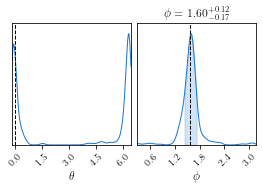

In [50]:
X1 = collect_samples(sampler1.history_path)
params = [r"$\theta$", r'$\phi$']
c = ChainConsumer().add_chain(X1, parameters=params)
summary = c.analysis.get_summary()
fig2 = c.plotter.plot_distributions(truth=[0, np.pi/2])
fig2.show()
# fig1 = corner.corner(X1) # X1 is one-dimensional

# Visualize samples on $\mathbb{S}^2 \hookrightarrow \mathbb{R}^3$

C:\Users\Alex\AppData\Local\Temp\ipykernel_11720\2130915177.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


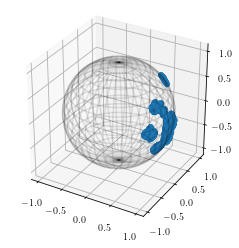

In [48]:
fig2, ax2 = plt.subplots(1, 1, subplot_kw={'projection':'3d'})

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))
ax2.plot_wireframe(x, y, z, color='k', alpha=0.1, rstride=1, cstride=1)

embedding_ensemble = lambda thetas: np.apply_along_axis(model.embedding, 1, thetas)
embedded_samples = embedding_ensemble(X1)
ax2.scatter(embedded_samples[:,0], embedded_samples[:,1], embedded_samples[:,2])
ax2.set_box_aspect([1,1,1]) # IMPORTANT - this is the new, key line
set_axes_equal(ax2) # IMPORTANT - this is also required
fig2.show()
#fig.show()

# Remarks
(1) Periodic coordinates can be "modded" to remain in the correct interval
(2) Under poor settings, particles may fall out of bounds on $\phi$ coordinate.
(3) Upon visual inspection, the particles appear to behave appropriately!



# Conclusion
There is certainly room for improvement with this scheme, however, it appears as though everything works as expected.

In [1]:
theta_1 = np.pi/2
theta_2 = 7 * np.pi / 4

theta_1 - theta_2

NameError: name 'np' is not defined